In [150]:
import numpy as np
import seaborn as sns

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

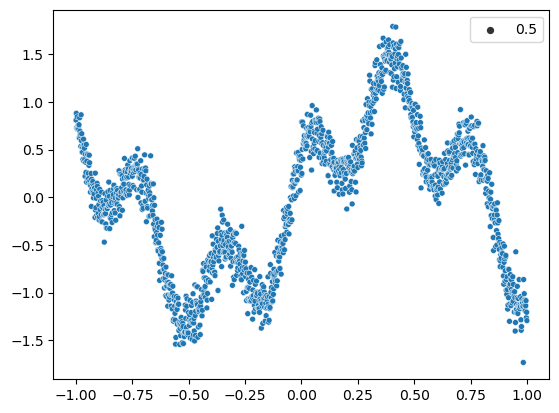

In [195]:
size = 1500
x = torch.linspace(-1.0, 1.0, size).double()
# Y_data = 0.5*(x)**3.0
Y_data = torch.sin(4*x)+ torch.sin(17*x+1.1)*0.5
Y_data += np.random.normal(size=size)*0.14
# y = torch.sum(Y_data)

sns.scatterplot(x=x,y=Y_data, size=0.5)


<AxesSubplot:>

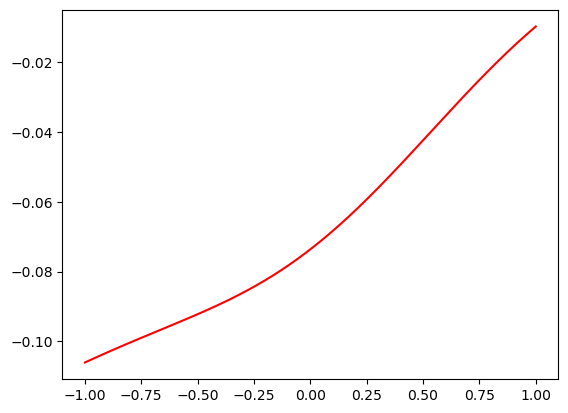

In [155]:
class LinearRegressor_1D(nn.Module):
    def __init__(self):
        super(LinearRegressor_1D, self).__init__()
        self.dropout = nn.Dropout(p=0.25)
        self.model = nn.Sequential(
            nn.Linear(1,256),
            nn.Tanh(),
            nn.Linear(256,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,1),

        )
        self.double()

    def forward(self, x):
        return self.model(x.unsqueeze(1)).squeeze()

    pass


f = LinearRegressor_1D()
y = f.forward(x)

# sns.scatterplot(x=x,y=Y_data)
sns.lineplot(x=x.squeeze().detach(), y=y.squeeze().detach(), color='red')

# loss = torch.nn.functional.mse_loss(y, Y_data)
# print(loss)

<AxesSubplot:>

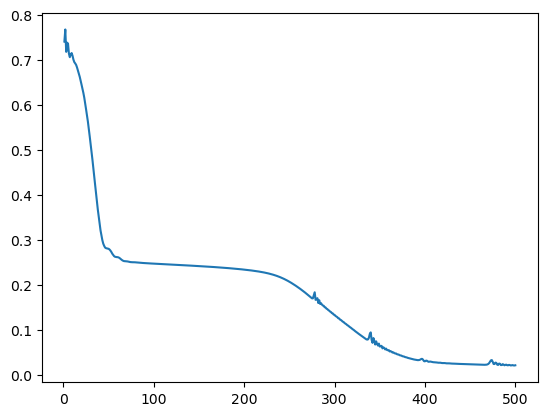

In [156]:
learn_rate = 0.001
optimizer = torch.optim.Adam(f.parameters(), lr=learn_rate)

epochs = 500
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()  # reiniciar los gradientes (poner en cero)

    y_fwd = f.forward(x)
    loss_value = torch.nn.functional.mse_loss(y_fwd, Y_data)
    # loss_value = torch.sum((y_fwd - Y_data)**2)

    loss_value.backward()  # compute gradient
    optimizer.step()    # Iterate Algorithm

    losses.append(loss_value.item())

    pass

x_ep = np.linspace(1, epochs, epochs)

sns.lineplot(x=x_ep, y=losses)

<AxesSubplot:>

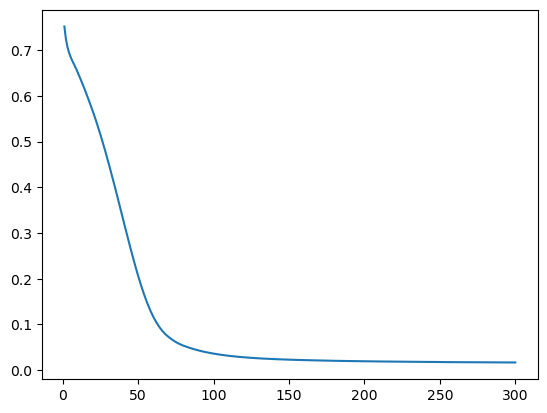

tensor(0.0210, dtype=torch.float64, grad_fn=<MseLossBackward0>)


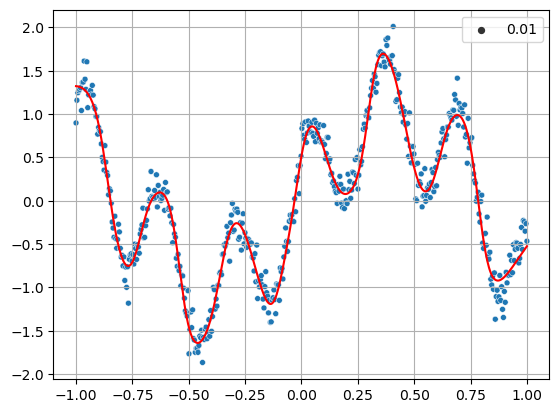

In [157]:
y = f.forward(x)

sns.scatterplot(x=x.squeeze(),y=Y_data.squeeze().detach(), size=0.01)
sns.lineplot(x=x.squeeze(), y=y.squeeze().detach(), color='red')
plt.grid(True)
loss = torch.nn.functional.mse_loss(y, Y_data)
print(loss)

In [149]:
y_fwd = f.forward(x)
loss_value = torch.nn.functional.mse_loss(y_fwd, Y_data)

print("loss:", loss_value)

loss: tensor(0.0235, dtype=torch.float64, grad_fn=<MseLossBackward0>)
